# Exploratory Data Analysis for Final Project

In this assignment, your task is to put your new skils to use in the form of an open-ended, exploratory data analysis. In particular, I'm looking for you to demonstrate your ability to use the programmatic tools we've been learning to access data, manipulate it, and visualize some findings while working towards the ultimate goal of developing a final project proposal. Please include the following in your assignment:

  1. A brief summary of the topic (a few sentences)
  2. Access 2 or more datasets, at least one of them using an API (if you are not using any data from an API as part of your project yet, don’t worry about it, and just do this to get some exercise using APIs. You might use it later).
  3. Demonstrate the use of Pandas operations to filter out missing data and/or outliers.
  4. Demonstrate your capacity to use some of the "group-by" operations to produce pivot tables or statistical summaries of your data.
  5. Use Matplotlib or Seaborn to produce 2-3 data visualizations of your data to both explore the data and highlight any notable patterns.
  6. Include a short written analysis of your interpretation of the data.
  7. In a few paragraphs, describe the research question you intend to investigate in your final project, and the plan for the data analysis you intend to perform.

Note that this exercise is intended to help you formulate your project topic. But it is not a binding contract. Your project will most likely evolve over the rest of the semester. So use this as an opportunity to be creative, throw some ideas against the wall and see what sticks. I will release the final project guidelines shortly. In the meantime, dig in!

And as always, please submit this assignment both as a PR on GitHub along with the URL of your PR on bCourses.

<font size=10> 1. A brief summary of the topic <font>

In this data analysis exercise, I will use census API to obtain Gini index (a measure of the distribution of income across a population used to gauge economic inequality) from 2012 to 2021 to analyse and compare the income inequality situation among counties in California. Also, to analyze the potential factors contribute to income inequality.

<font size=10> 2. Access datasets by API <font>

In [2]:
# import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# import cencus API
from census import Census
from us import states

C:\Users\cuiya\AppData\Local\Temp\ipykernel_34444\2506580412.py:6: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


<font size=5> access to census API <font>

In [3]:
# read my API key for census
import json
with open("C:/Users/cuiya/OneDrive/桌面/course_2024 Spring/5_urban informatics/1-assignments/Assignments/yanyao/census_api_key_Yanyao.json","r") as f:
    key_file = f.read()
my_api_key = json.loads(key_file)["key"]

<font size=5> create a function to obtain data from census API <font>

In [4]:
def fetch_census_data(fields, years):
    c = Census(my_api_key)
    all_year_data = pd.DataFrame()
    for year in years:
        data = c.acs5.state_county_tract(fields=fields,
                                         state_fips=states.CA.fips, #fetch the fips code for California
                                         county_fips="*", # fetch all counties
                                         tract="*", # fetch all tracts
                                         year=year)
        #transform the data to dataframe
        df = pd.DataFrame(data)
        # add new colums to store the year data
        df["year"] = year
        # concatenate the data
        all_year_data = pd.concat([all_year_data, df], ignore_index=True)
    return all_year_data

<font size=5> Fetch Responsing Variables <font>

>The Gini Index, a widely used metric for assessing income inequality ***(Farris,F.A,2010)***, provides valuable insights into the socioeconomic disparities within a population. At the Census Tract level, a more granular examination of these disparities becomes possible, making it an essential tool for understanding localized inequalities. ACS has published the table ***[B19083(Gini Index of income inequality)](https://data.census.gov/table?q=B19083:%20Gini%20Index%20of%20Income%20Inequality&g=010XX00US$1400000)*** from 2010-2021, and you can click the link to review it.

In [5]:
fields = ["NAME", "B19083_001E"] # 'B19083_001E': gini index estimate
years = list(range(2012, 2022))

# fetch the data by calling the function
acs_ca_gini = fetch_census_data(fields, years)
acs_ca_gini

,NAME,B19083_001E,state,county,tract,year
0,"Census Tract 198.09, San Diego County, California",0.4228,06,073,019809,2012
1,"Census Tract 200.26, San Diego County, California",0.3917,06,073,020026,2012
2,"Census Tract 200.27, San Diego County, California",0.4883,06,073,020027,2012
3,"Census Tract 170.56, San Diego County, California",0.3372,06,073,017056,2012
4,"Census Tract 186.14, San Diego County, California",0.4001,06,073,018614,2012
...,...,...,...,...,...,...
82709,"Census Tract 409.02, Yuba County, California",0.4151,06,115,040902,2021
82710,"Census Tract 410.01, Yuba County, California",0.4713,06,115,041001,2021
82711,"Census Tract 410.02, Yuba County, California",0.4062,06,115,041002,2021
82712,"Census Tract 411.01, Yuba County, California",0.4137,06,115,041101,2021


In [6]:
# rename the colum name of B19083_001E as gini_index
acs_ca_gini = acs_ca_gini.rename(columns={'B19083_001E': 'gini_index'})
# add new colum named GEO_ID and store the GEO ID formed by codes from "state, county and tract" colums
acs_ca_gini['GEO_ID'] = acs_ca_gini['state'] + acs_ca_gini['county'] + acs_ca_gini['tract']
acs_ca_gini

,NAME,gini_index,state,county,tract,year,GEO_ID
0,"Census Tract 198.09, San Diego County, California",0.4228,06,073,019809,2012,06073019809
1,"Census Tract 200.26, San Diego County, California",0.3917,06,073,020026,2012,06073020026
2,"Census Tract 200.27, San Diego County, California",0.4883,06,073,020027,2012,06073020027
3,"Census Tract 170.56, San Diego County, California",0.3372,06,073,017056,2012,06073017056
4,"Census Tract 186.14, San Diego County, California",0.4001,06,073,018614,2012,06073018614
...,...,...,...,...,...,...,...
82709,"Census Tract 409.02, Yuba County, California",0.4151,06,115,040902,2021,06115040902
82710,"Census Tract 410.01, Yuba County, California",0.4713,06,115,041001,2021,06115041001
82711,"Census Tract 410.02, Yuba County, California",0.4062,06,115,041002,2021,06115041002
82712,"Census Tract 411.01, Yuba County, California",0.4137,06,115,041101,2021,06115041101


<font size=5> Fetch other correlated data which is potential factor contribut to income inequity <font>.

<font size=3> 1.racial data <font>

In [7]:
fields = ['NAME', 'B02001_001E','B02001_002E','B02001_003E','B02001_005E'] # 'B02001_001E': Total pop, 'B02001_002E': White alone, 'B02001_003E': Black or African American alone, 'B02001_005E': Asian alone
years = list(range(2012, 2022))

# fetch the data by calling the function
acs_ca_demo = fetch_census_data(fields, years)
acs_ca_demo

,NAME,B02001_001E,B02001_002E,B02001_003E,B02001_005E,state,county,tract,year
0,"Census Tract 198.09, San Diego County, California",4122.0,3649.0,4.0,158.0,06,073,019809,2012
1,"Census Tract 200.26, San Diego County, California",4508.0,3590.0,1.0,273.0,06,073,020026,2012
2,"Census Tract 200.27, San Diego County, California",13407.0,11101.0,243.0,840.0,06,073,020027,2012
3,"Census Tract 170.56, San Diego County, California",4076.0,2734.0,326.0,678.0,06,073,017056,2012
4,"Census Tract 186.14, San Diego County, California",6274.0,3774.0,321.0,302.0,06,073,018614,2012
...,...,...,...,...,...,...,...,...,...
82709,"Census Tract 409.02, Yuba County, California",1730.0,1251.0,188.0,50.0,06,115,040902,2021
82710,"Census Tract 410.01, Yuba County, California",3910.0,2802.0,74.0,6.0,06,115,041001,2021
82711,"Census Tract 410.02, Yuba County, California",3408.0,2630.0,316.0,33.0,06,115,041002,2021
82712,"Census Tract 411.01, Yuba County, California",2620.0,2144.0,128.0,59.0,06,115,041101,2021


In [8]:
#create a new colum for GEO_ID
acs_ca_demo['GEO_ID'] = acs_ca_demo['state'] + acs_ca_demo['county'] + acs_ca_demo['tract']
# rename the colum with understandable name
acs_ca_demo = acs_ca_demo.rename(columns={'B02001_001E': 'total_pop', 'B02001_002E': 'white_alone', 'B02001_003E': 'black_alone', 'B02001_005E': 'asian_alone'})

acs_ca_demo .info()
acs_ca_demo .head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82714 entries, 0 to 82713
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NAME         82714 non-null  object 
 1   total_pop    82714 non-null  float64
 2   white_alone  82714 non-null  float64
 3   black_alone  82714 non-null  float64
 4   asian_alone  82714 non-null  float64
 5   state        82714 non-null  object 
 6   county       82714 non-null  object 
 7   tract        82714 non-null  object 
 8   year         82714 non-null  int64  
 9   GEO_ID       82714 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 6.3+ MB


,NAME,total_pop,white_alone,black_alone,asian_alone,state,county,tract,year,GEO_ID
0,"Census Tract 198.09, San Diego County, California",4122.0,3649.0,4.0,158.0,06,073,019809,2012,06073019809
1,"Census Tract 200.26, San Diego County, California",4508.0,3590.0,1.0,273.0,06,073,020026,2012,06073020026
2,"Census Tract 200.27, San Diego County, California",13407.0,11101.0,243.0,840.0,06,073,020027,2012,06073020027
3,"Census Tract 170.56, San Diego County, California",4076.0,2734.0,326.0,678.0,06,073,017056,2012,06073017056
4,"Census Tract 186.14, San Diego County, California",6274.0,3774.0,321.0,302.0,06,073,018614,2012,06073018614


In [ ]:
#Add new columns for the percentage of white, black, and Asian people
#Select the most relevant columns

In [9]:
acs_ca_demo['white_perc'] = acs_ca_demo['white_alone'] / acs_ca_demo['total_pop']
acs_ca_demo['black_perc'] = acs_ca_demo['black_alone'] / acs_ca_demo['total_pop']
acs_ca_demo['asian_perc'] = acs_ca_demo['asian_alone'] / acs_ca_demo['total_pop']

acs_ca_demo = acs_ca_demo[['NAME', 'total_pop', 'white_perc', 'black_perc', 'asian_perc', 'state', 'county','tract','year','GEO_ID']]
acs_ca_demo.info()
acs_ca_demo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82714 entries, 0 to 82713
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NAME        82714 non-null  object 
 1   total_pop   82714 non-null  float64
 2   white_perc  82270 non-null  float64
 3   black_perc  82270 non-null  float64
 4   asian_perc  82270 non-null  float64
 5   state       82714 non-null  object 
 6   county      82714 non-null  object 
 7   tract       82714 non-null  object 
 8   year        82714 non-null  int64  
 9   GEO_ID      82714 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 6.3+ MB


,NAME,total_pop,white_perc,black_perc,asian_perc,state,county,tract,year,GEO_ID
0,"Census Tract 198.09, San Diego County, California",4122.0,0.885250,0.000970,0.038331,06,073,019809,2012,06073019809
1,"Census Tract 200.26, San Diego County, California",4508.0,0.796362,0.000222,0.060559,06,073,020026,2012,06073020026
2,"Census Tract 200.27, San Diego County, California",13407.0,0.828000,0.018125,0.062654,06,073,020027,2012,06073020027
3,"Census Tract 170.56, San Diego County, California",4076.0,0.670756,0.079980,0.166340,06,073,017056,2012,06073017056
4,"Census Tract 186.14, San Diego County, California",6274.0,0.601530,0.051164,0.048135,06,073,018614,2012,06073018614
...,...,...,...,...,...,...,...,...,...,...
82709,"Census Tract 409.02, Yuba County, California",1730.0,0.723121,0.108671,0.028902,06,115,040902,2021,06115040902
82710,"Census Tract 410.01, Yuba County, California",3910.0,0.716624,0.018926,0.001535,06,115,041001,2021,06115041001
82711,"Census Tract 410.02, Yuba County, California",3408.0,0.771714,0.092723,0.009683,06,115,041002,2021,06115041002
82712,"Census Tract 411.01, Yuba County, California",2620.0,0.818321,0.048855,0.022519,06,115,041101,2021,06115041101


<font size = 3>2. Obtain Education Level Data <font>

In [10]:
# use the same function previously defined
# change the fields and years variables
fields = ['NAME', 'B15003_001E', 'B15003_022E','B15003_023E','B15003_024E','B15003_025E'] # 'B15003_001E' : Total pop, 'B15003_022E': Bachelor's degree, 'B15003_023E': Master's degree, 'B15003_024E': Professional school degree, 'B15003_025E': Doctorate degree
years = list(range(2012, 2022))

# fetch the data by calling the function
acs_ca_edu = fetch_census_data(fields, years)
acs_ca_edu['GEO_ID'] = acs_ca_edu['state'] + acs_ca_edu['county'] + acs_ca_edu['tract']
acs_ca_edu = acs_ca_edu.rename(columns={'B15003_001E':'total', 'B15003_022E': 'ba', 'B15003_023E': 'ma', 'B15003_024E': 'pa', 'B15003_025E': 'doc'})
acs_ca_edu.info()
acs_ca_edu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82714 entries, 0 to 82713
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NAME    82714 non-null  object 
 1   total   82714 non-null  float64
 2   ba      82714 non-null  float64
 3   ma      82714 non-null  float64
 4   pa      82714 non-null  float64
 5   doc     82714 non-null  float64
 6   state   82714 non-null  object 
 7   county  82714 non-null  object 
 8   tract   82714 non-null  object 
 9   year    82714 non-null  int64  
 10  GEO_ID  82714 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 6.9+ MB


,NAME,total,ba,ma,pa,doc,state,county,tract,year,GEO_ID
0,"Census Tract 198.09, San Diego County, California",2848.0,647.0,308.0,151.0,66.0,06,073,019809,2012,06073019809
1,"Census Tract 200.26, San Diego County, California",3329.0,775.0,347.0,112.0,70.0,06,073,020026,2012,06073020026
2,"Census Tract 200.27, San Diego County, California",8890.0,3005.0,870.0,229.0,223.0,06,073,020027,2012,06073020027
3,"Census Tract 170.56, San Diego County, California",2695.0,1016.0,424.0,23.0,78.0,06,073,017056,2012,06073017056
4,"Census Tract 186.14, San Diego County, California",4308.0,550.0,122.0,37.0,0.0,06,073,018614,2012,06073018614
...,...,...,...,...,...,...,...,...,...,...,...
82709,"Census Tract 409.02, Yuba County, California",516.0,94.0,77.0,7.0,0.0,06,115,040902,2021,06115040902
82710,"Census Tract 410.01, Yuba County, California",2996.0,363.0,413.0,27.0,32.0,06,115,041001,2021,06115041001
82711,"Census Tract 410.02, Yuba County, California",2567.0,421.0,154.0,55.0,18.0,06,115,041002,2021,06115041002
82712,"Census Tract 411.01, Yuba County, California",1899.0,226.0,9.0,26.0,9.0,06,115,041101,2021,06115041101


In [11]:
# add new colum about percentage of higher education
acs_ca_edu['ba_higher_perc'] = (acs_ca_edu['ba'] + acs_ca_edu['ma'] + acs_ca_edu['pa']  + acs_ca_edu['doc'] ) / acs_ca_edu['total']
# select the most relevant colums
acs_ca_edu = acs_ca_edu[['NAME', 'ba_higher_perc', 'state', 'county','tract','year','GEO_ID']]
acs_ca_edu.info()
acs_ca_edu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82714 entries, 0 to 82713
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NAME            82714 non-null  object 
 1   ba_higher_perc  82239 non-null  float64
 2   state           82714 non-null  object 
 3   county          82714 non-null  object 
 4   tract           82714 non-null  object 
 5   year            82714 non-null  int64  
 6   GEO_ID          82714 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 4.4+ MB


,NAME,ba_higher_perc,state,county,tract,year,GEO_ID
0,"Census Tract 198.09, San Diego County, California",0.411517,06,073,019809,2012,06073019809
1,"Census Tract 200.26, San Diego County, California",0.391709,06,073,020026,2012,06073020026
2,"Census Tract 200.27, San Diego County, California",0.486727,06,073,020027,2012,06073020027
3,"Census Tract 170.56, San Diego County, California",0.571800,06,073,017056,2012,06073017056
4,"Census Tract 186.14, San Diego County, California",0.164578,06,073,018614,2012,06073018614
...,...,...,...,...,...,...,...
82709,"Census Tract 409.02, Yuba County, California",0.344961,06,115,040902,2021,06115040902
82710,"Census Tract 410.01, Yuba County, California",0.278705,06,115,041001,2021,06115041001
82711,"Census Tract 410.02, Yuba County, California",0.252435,06,115,041002,2021,06115041002
82712,"Census Tract 411.01, Yuba County, California",0.142180,06,115,041101,2021,06115041101


<font size=10> 03. Filter the Data <font>

In [12]:
# merge the previous three dataframe into one
# merge all data together
acs_ca_all = acs_ca_demo[['NAME','state','county','tract','year','GEO_ID','total_pop','white_perc','black_perc','asian_perc']].merge(acs_ca_edu[['ba_higher_perc','year','GEO_ID']], on=['GEO_ID', 'year'], how='left').merge(acs_ca_gini[['gini_index','year','GEO_ID']], on=['GEO_ID', 'year'], how='left')
acs_ca_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82714 entries, 0 to 82713
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NAME            82714 non-null  object 
 1   state           82714 non-null  object 
 2   county          82714 non-null  object 
 3   tract           82714 non-null  object 
 4   year            82714 non-null  int64  
 5   GEO_ID          82714 non-null  object 
 6   total_pop       82714 non-null  float64
 7   white_perc      82270 non-null  float64
 8   black_perc      82270 non-null  float64
 9   asian_perc      82270 non-null  float64
 10  ba_higher_perc  82239 non-null  float64
 11  gini_index      82714 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 7.6+ MB


In [13]:
# delete the null values
acs_ca_all = acs_ca_all.dropna()
acs_ca_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82239 entries, 0 to 82713
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NAME            82239 non-null  object 
 1   state           82239 non-null  object 
 2   county          82239 non-null  object 
 3   tract           82239 non-null  object 
 4   year            82239 non-null  int64  
 5   GEO_ID          82239 non-null  object 
 6   total_pop       82239 non-null  float64
 7   white_perc      82239 non-null  float64
 8   black_perc      82239 non-null  float64
 9   asian_perc      82239 non-null  float64
 10  ba_higher_perc  82239 non-null  float64
 11  gini_index      82239 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 8.2+ MB


In [14]:
# desceribe the data
acs_ca_all[['total_pop','white_perc','black_perc','asian_perc','ba_higher_perc','gini_index']].describe()

,total_pop,white_perc,black_perc,asian_perc,ba_higher_perc,gini_index
count,82239.000000,82239.000000,82239.000000,82239.000000,82239.000000,8.223900e+04
mean,4697.789382,0.604656,0.058863,0.134990,0.318655,-2.958855e+06
std,2043.304049,0.211415,0.090853,0.154506,0.210197,4.431523e+07
min,1.000000,0.000000,0.000000,0.000000,0.000000,-6.666667e+08
25%,3370.000000,0.450505,0.008717,0.029176,0.143381,3.774000e-01
50%,4466.000000,0.635778,0.026936,0.080344,0.275263,4.148000e-01
75%,5717.000000,0.777019,0.069568,0.177835,0.466278,4.560000e-01
max,40616.000000,1.000000,0.926520,1.000000,1.000000,9.032000e-01


In [16]:
# based on the above dataframe infomation, I noticed there are impossible values refer to gini_index which should be between 0 to 1. 
# in the next step, I will disclude these impossible values
acs_ca_filters = acs_ca_all[(acs_ca_all['gini_index'] > 0) & (acs_ca_all['gini_index'] < 1)].reset_index(drop=True)
acs_ca_filters.info()
acs_ca_filters

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81874 entries, 0 to 81873
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NAME            81874 non-null  object 
 1   state           81874 non-null  object 
 2   county          81874 non-null  object 
 3   tract           81874 non-null  object 
 4   year            81874 non-null  int64  
 5   GEO_ID          81874 non-null  object 
 6   total_pop       81874 non-null  float64
 7   white_perc      81874 non-null  float64
 8   black_perc      81874 non-null  float64
 9   asian_perc      81874 non-null  float64
 10  ba_higher_perc  81874 non-null  float64
 11  gini_index      81874 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 7.5+ MB


,NAME,state,county,tract,year,GEO_ID,total_pop,white_perc,black_perc,asian_perc,ba_higher_perc,gini_index
0,"Census Tract 198.09, San Diego County, California",06,073,019809,2012,06073019809,4122.0,0.885250,0.000970,0.038331,0.411517,0.4228
1,"Census Tract 200.26, San Diego County, California",06,073,020026,2012,06073020026,4508.0,0.796362,0.000222,0.060559,0.391709,0.3917
2,"Census Tract 200.27, San Diego County, California",06,073,020027,2012,06073020027,13407.0,0.828000,0.018125,0.062654,0.486727,0.4883
3,"Census Tract 170.56, San Diego County, California",06,073,017056,2012,06073017056,4076.0,0.670756,0.079980,0.166340,0.571800,0.3372
4,"Census Tract 186.14, San Diego County, California",06,073,018614,2012,06073018614,6274.0,0.601530,0.051164,0.048135,0.164578,0.4001
...,...,...,...,...,...,...,...,...,...,...,...,...
81869,"Census Tract 409.02, Yuba County, California",06,115,040902,2021,06115040902,1730.0,0.723121,0.108671,0.028902,0.344961,0.4151
81870,"Census Tract 410.01, Yuba County, California",06,115,041001,2021,06115041001,3910.0,0.716624,0.018926,0.001535,0.278705,0.4713
81871,"Census Tract 410.02, Yuba County, California",06,115,041002,2021,06115041002,3408.0,0.771714,0.092723,0.009683,0.252435,0.4062
81872,"Census Tract 411.01, Yuba County, California",06,115,041101,2021,06115041101,2620.0,0.818321,0.048855,0.022519,0.142180,0.4137


In [17]:
# add a new colum of county_name by first spliting the NAME colum, then selecting the county name from it.
acs_ca_filters['NAME'].str.split(',').str.get(1)
acs_ca_filters.insert(3, 'county_name', acs_ca_filters['NAME'].str.split(',').str.get(1))
acs_ca_filters.info()
acs_ca_filters

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81874 entries, 0 to 81873
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NAME            81874 non-null  object 
 1   state           81874 non-null  object 
 2   county          81874 non-null  object 
 3   county_name     81874 non-null  object 
 4   tract           81874 non-null  object 
 5   year            81874 non-null  int64  
 6   GEO_ID          81874 non-null  object 
 7   total_pop       81874 non-null  float64
 8   white_perc      81874 non-null  float64
 9   black_perc      81874 non-null  float64
 10  asian_perc      81874 non-null  float64
 11  ba_higher_perc  81874 non-null  float64
 12  gini_index      81874 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 8.1+ MB


,NAME,state,county,county_name,tract,year,GEO_ID,total_pop,white_perc,black_perc,asian_perc,ba_higher_perc,gini_index
0,"Census Tract 198.09, San Diego County, California",06,073,San Diego County,019809,2012,06073019809,4122.0,0.885250,0.000970,0.038331,0.411517,0.4228
1,"Census Tract 200.26, San Diego County, California",06,073,San Diego County,020026,2012,06073020026,4508.0,0.796362,0.000222,0.060559,0.391709,0.3917
2,"Census Tract 200.27, San Diego County, California",06,073,San Diego County,020027,2012,06073020027,13407.0,0.828000,0.018125,0.062654,0.486727,0.4883
3,"Census Tract 170.56, San Diego County, California",06,073,San Diego County,017056,2012,06073017056,4076.0,0.670756,0.079980,0.166340,0.571800,0.3372
4,"Census Tract 186.14, San Diego County, California",06,073,San Diego County,018614,2012,06073018614,6274.0,0.601530,0.051164,0.048135,0.164578,0.4001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81869,"Census Tract 409.02, Yuba County, California",06,115,Yuba County,040902,2021,06115040902,1730.0,0.723121,0.108671,0.028902,0.344961,0.4151
81870,"Census Tract 410.01, Yuba County, California",06,115,Yuba County,041001,2021,06115041001,3910.0,0.716624,0.018926,0.001535,0.278705,0.4713
81871,"Census Tract 410.02, Yuba County, California",06,115,Yuba County,041002,2021,06115041002,3408.0,0.771714,0.092723,0.009683,0.252435,0.4062
81872,"Census Tract 411.01, Yuba County, California",06,115,Yuba County,041101,2021,06115041101,2620.0,0.818321,0.048855,0.022519,0.142180,0.4137


<font size=10> 4. Organize the obtained Data by Groupby Method or Pivot Table <font>

In [ ]:
# in this section my goal is to use pivot table to review the gini_index of 15 top populated counties from 2012 to 2021; 

# to do this, first I use groupby method to obtain the overall population for each county based on the data for 2021. 
# then I select the top 15 populated ones based on that, and use pivot table method to exam the selected counties's gini_index from 2012 to 2021.

In [18]:
acs_ca_filters[acs_ca_filters['year'] == 2021].groupby('county_name')['total_pop'].sum().sort_values(ascending=False).head(15)

county_name
 Los Angeles County       9987153.0
 San Diego County         3277005.0
 Orange County            3182888.0
 Riverside County         2395838.0
 San Bernardino County    2154679.0
 Santa Clara County       1932022.0
 Alameda County           1673133.0
 Sacramento County        1571767.0
 Contra Costa County      1161028.0
 Fresno County            1003150.0
 Kern County               888316.0
 San Francisco County      865762.0
 Ventura County            845134.0
 San Joaquin County        769172.0
 San Mateo County          762488.0
Name: total_pop, dtype: float64

In [19]:
# create a list of the top 15 counties
seleced_counties = [' Los Angeles County', ' San Diego County', ' Orange County', ' Riverside County', ' San Bernardino County', ' Santa Clara County', ' Alameda County', ' Sacramento County', ' Contra Costa County', ' Fresno County', ' Kern County', ' San Francisco County', ' Ventura County', ' San Mateo County', ' San Joaquin County']

In [20]:
gini_pivot_table = pd.pivot_table(acs_ca_filters[acs_ca_filters['county_name'].isin(seleced_counties)], values='gini_index', index=['county_name'], columns=['year'])
gini_pivot_table

year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
county_name,,,,,,,,,,
Alameda County,0.406489,0.412559,0.415725,0.417139,0.418302,0.417475,0.415615,0.417010,0.416334,0.419358
Contra Costa County,0.397681,0.401008,0.401188,0.405471,0.405171,0.407053,0.407790,0.406720,0.399962,0.402333
Fresno County,0.411806,0.414374,0.417645,0.419989,0.425312,0.425570,0.424161,0.424310,0.421370,0.421846
Kern County,0.406567,0.408431,0.408805,0.411829,0.413210,0.415151,0.416793,0.418501,0.403366,0.401396
Los Angeles County,0.418443,0.420667,0.423297,0.426612,0.429759,0.430985,0.431030,0.431369,0.431134,0.432000
Orange County,0.403289,0.406340,0.409763,0.412859,0.414587,0.415500,0.417962,0.417680,0.416591,0.419046
Riverside County,0.393212,0.396178,0.400645,0.402273,0.405345,0.409301,0.412103,0.413083,0.407506,0.406427
Sacramento County,0.395630,0.403044,0.408924,0.413122,0.416997,0.417437,0.416228,0.412495,0.407207,0.404596
San Bernardino County,0.390404,0.394216,0.398331,0.402469,0.405111,0.403948,0.403206,0.401711,0.395506,0.396260


<font size=10> 05. Data Visualization by Matplolib and Seaborn <font>

hist figure to show the **mean** gini index distribution over year in selected counties(Top 15 Counties)

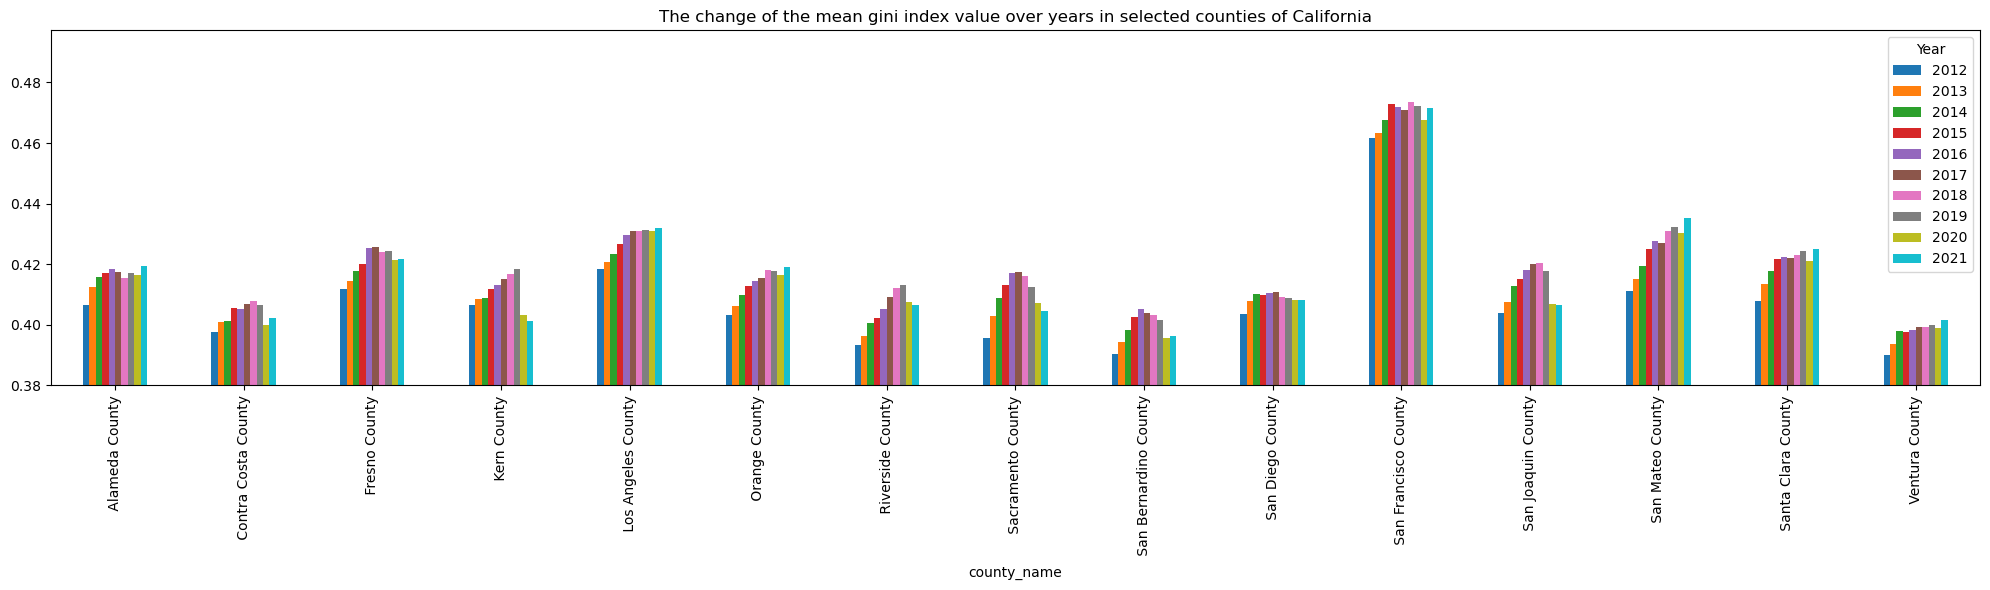

In [21]:
ax = gini_pivot_table.plot(
                            kind='bar', 
                            figsize=(20,6),
                            title='The change of the mean gini index value over years in selected counties of California')

ax.legend(title='Year')
ax.set_ylim([0.38, None])

plt.tight_layout()
plt.show()

use kdeplot to show gini index distribution over years in 15 counties of California

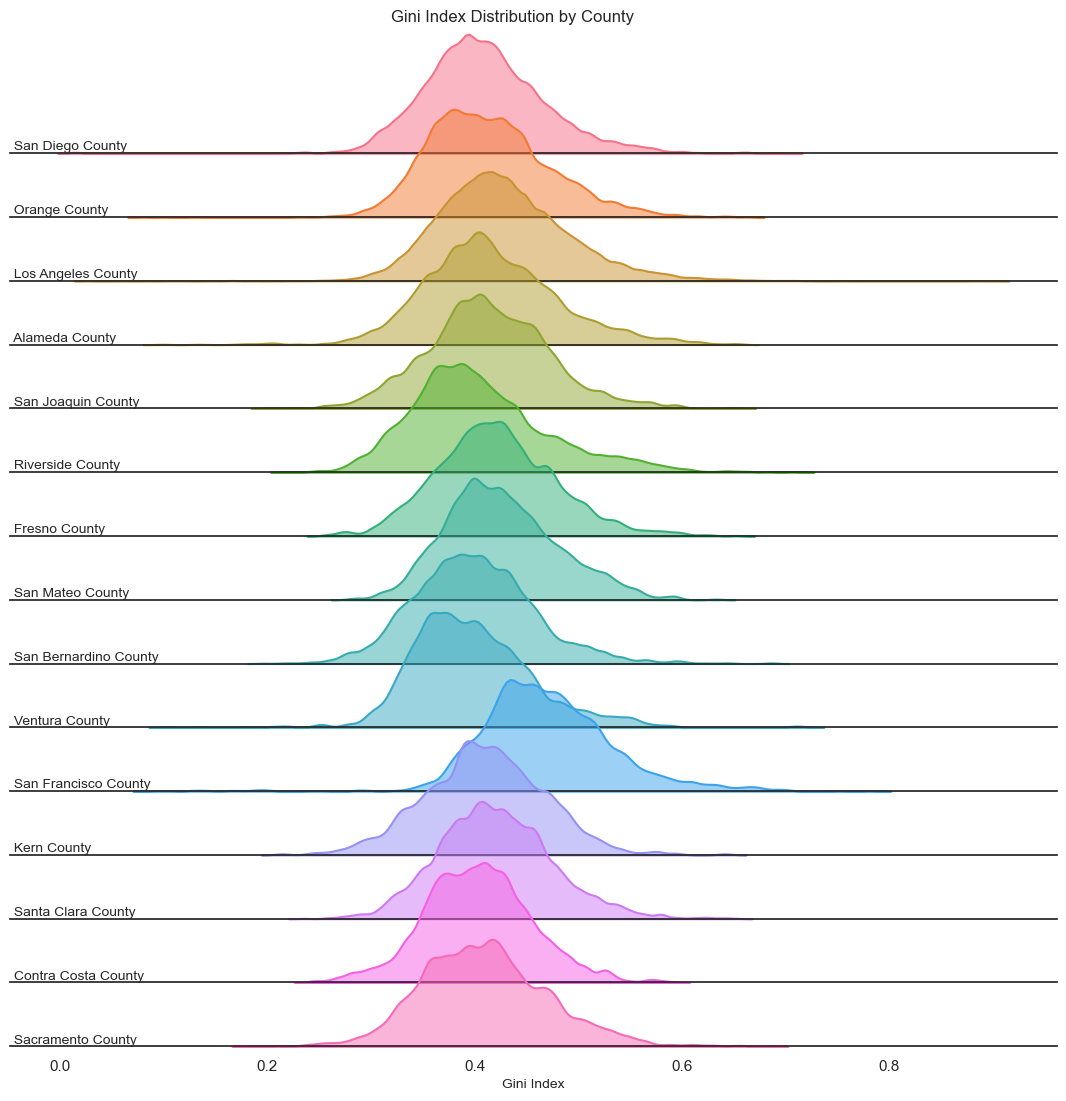

In [23]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# Create FacetGrid object
g = sns.FacetGrid(acs_ca_filters[acs_ca_filters['county_name'].isin(seleced_counties)], 
                  row="county_name", 
                  hue="county_name", 
                  aspect=15, 
                  height=.75)

# Create the KDE plot
g.map(sns.kdeplot, "gini_index",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=.5, linewidth=1.5)

# Adjust the space between the plots
g.figure.subplots_adjust(hspace=-0.5)

# Remove the yticks and despine
g.set(yticks=[])
g.despine(left=True)

# Set the x-axis label
g.set_axis_labels("Gini Index", fontsize=10)

# Set the title for each plot based on the actual order in the FacetGrid
for ax, name in zip(g.axes.flat, g.row_names):
    ax.set_title("")  # Clear the autogenerated title
    ax.set_ylabel(name, fontsize=10, rotation=0, loc='bottom', labelpad=0)  # Set the ylabel to county name

# Add an overall title for the figure
g.fig.suptitle('Gini Index Distribution by County', fontsize=12)

plt.show()

Pairplot Map to show the relationship between gini index and other variables in all couties in CA

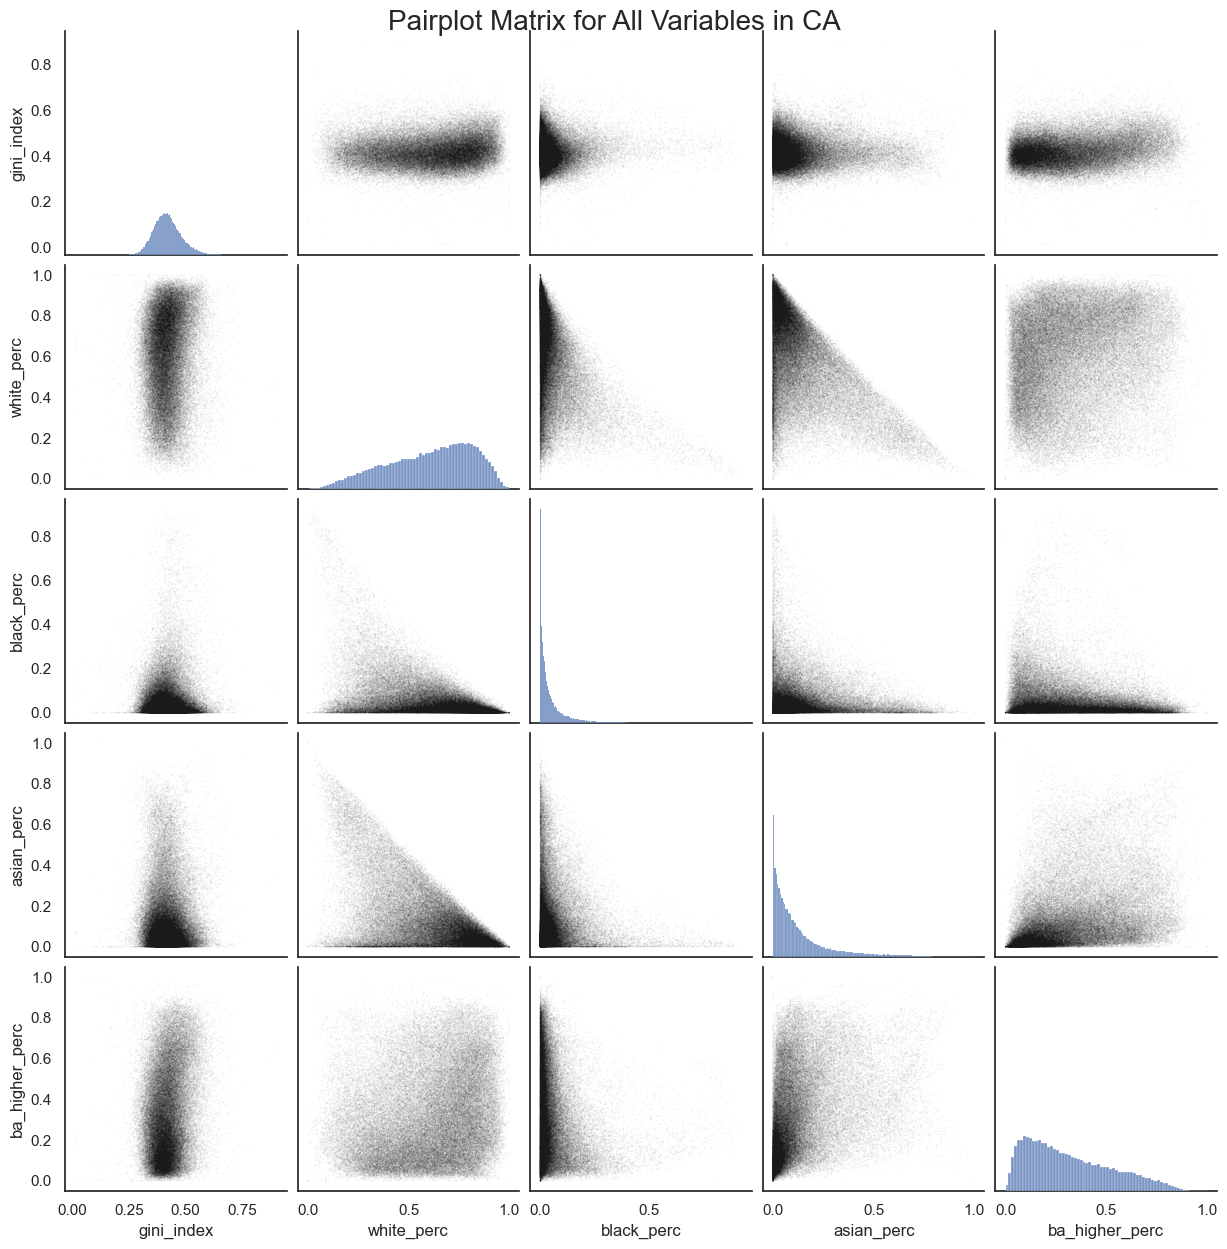

In [24]:
g = sns.pairplot(acs_ca_filters[['gini_index','white_perc', 'black_perc', 'asian_perc', 'ba_higher_perc']],
                 plot_kws={'alpha': 0.05, 's': 1, 'edgecolor': 'none', 'facecolor': 'k'});

# add the title
plt.suptitle('Pairplot Matrix for All Variables in CA', size=20, y=1)
plt.show()

# 06.Brief Data Analysis

>based on the graphs above, I can observe some relationship patterns between them that the `white_pec` and `gini index` and `ba_higher_perc` distribution looks like subject to normoal distribution,but `asian_pec` and `black_perc` looks like skewed distribution.

# 07.The Research Question and Methodology for follow-up Plan

my research question would be analysis what are the potential factors contribute to income inequity in the city with the highest gini index in California.

methodology: 1. read paper to obtain guidance of finding potential factors of income inequity; 2. using data for California to exam the factor I find from papers; 3. compare and analyse the correlation patterns and have conclusion.